In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import itertools

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

## __Loading data__

In [2]:
df = pd.read_csv('candy-power-ranking/candy-data.csv', index_col=0).sort_values(by='winpercent', ascending=False)
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, ReeseÕs Peanut Butter cup to Nik L Nip
Data columns (total 12 columns):
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB


In [4]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


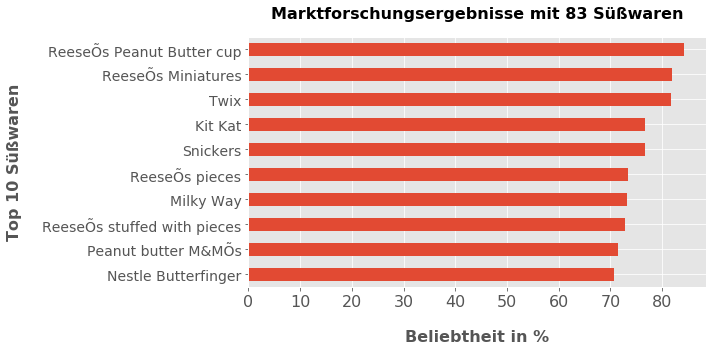

In [5]:
plt.style.use('ggplot')

df_plot = df.sort_values(by='winpercent', ascending=True).reset_index()
fig = df_plot.loc[len(df)-10:, :].plot(kind='barh', x='competitorname', y='winpercent', figsize=(10,5), legend=False);

fig.yaxis.labelpad = 20
fig.xaxis.labelpad = 20
plt.ylabel(ylabel = 'Top 10 Süßwaren', weight='bold', fontsize=16)
plt.xlabel(xlabel='Beliebtheit in %', weight='bold', fontsize=16)
plt.title('Marktforschungsergebnisse mit 83 Süßwaren', weight='bold', fontsize=16)
title = fig.title
title.set_position([.5, 1.05])

#hide ylabel
#ax1 = plt.axes()
#y_axis = ax1.axes.get_yaxis()
#y_axis.set_label_text('foo')
#y_label = y_axis.get_label()
#y_label.set_visible(False)

for tick in fig.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
for tick in fig.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    
plt.tight_layout()
    
file_path = '/home/user/Desktop/Privat/Bewerbungen/2020/Lidl/case_study/images/market_research'
plt.savefig(file_path)

In [6]:
df.shape

(85, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, ReeseÕs Peanut Butter cup to Nik L Nip
Data columns (total 12 columns):
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB


In [8]:
df.isna().any()

chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
dtype: bool

## __Pre-examinations__

### __Separating numericals and categoricals__

In [9]:
numericals = ['sugarpercent', 'pricepercent', 'winpercent']

categoricals = list(df.columns)
[categoricals.remove(i) for i in numericals]
categoricals

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus']

### __Inter-feature and feature-target correlations__

#### __Numericals with Pearson_R__

< 0.3: no correlation

between 0.3 and 0.7: moderate correlation

\> 0.7: strong correlation

In [10]:
df.loc[:, numericals].corr()

,sugarpercent,pricepercent,winpercent
sugarpercent,1.000000,0.329706,0.229151
pricepercent,0.329706,1.000000,0.345325
winpercent,0.229151,0.345325,1.000000


__The only considerable correlation is at an almost negligible level between price and win.__

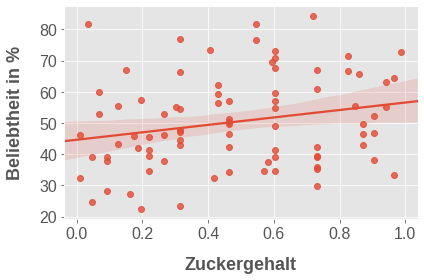

In [11]:
plt.figure(figsize=(6,4))
fig = sns.regplot(x='sugarpercent', y='winpercent', data=df)
plt.style.use('seaborn')

fig.yaxis.labelpad = 15
fig.xaxis.labelpad = 15
plt.ylabel(ylabel = 'Beliebtheit in %', weight='bold', fontsize=18)
plt.xlabel(xlabel='Zuckergehalt', weight='bold', fontsize=18)
#plt.title('Handhabung', weight='bold', fontsize=20)
title = fig.title

for tick in fig.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
for tick in fig.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

plt.tight_layout()
    
file_path = '/home/user/Desktop/Privat/Bewerbungen/2020/Lidl/case_study/images/winpercent_sugarpercent'
plt.savefig(file_path)

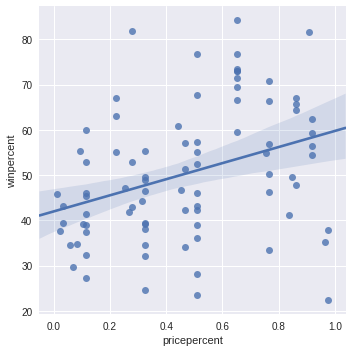

In [12]:
sns.lmplot(x='pricepercent', y='winpercent', data=df)
plt.style.use('seaborn')

#### __Categoricals with Chi square__

H0: categoricals are independent from each other (p_val >= 0.05)

H1: categoricals are dependent (p_val < 0.05)

In [13]:
def chi2(df, features):
    
    categorical_combinations = list(itertools.combinations(features, 2))
    df_stats = pd.DataFrame()

    for i, j in categorical_combinations:
        contingency_table = pd.crosstab(df[f'{i}']>0, df[f'{j}']>0)
        
        odds_same = (contingency_table.iloc[(1, 1)] + contingency_table.iloc[(0, 0)]) / (contingency_table.iloc[0, 1] + 
                                                        contingency_table.iloc[(1, 0)])
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
        
        df_i = pd.DataFrame(
            index=[f'{i}, {j}'],
            data={
                'p_val': round(p_val,3), 
                'odds_same': odds_same,}
        )
        
        df_stats = df_stats.append(df_i)
    return df_stats

In [14]:
categorical_correlations = chi2(df, categoricals)
categorical_correlations[categorical_correlations.p_val<0.05]

,p_val,odds_same
"chocolate, fruity",0.000,0.164384
"chocolate, caramel",0.045,1.741935
"chocolate, peanutyalmondy",0.001,2.148148
"chocolate, crispedricewafer",0.006,1.833333
"chocolate, hard",0.004,0.700000
"chocolate, bar",0.000,3.722222
"chocolate, pluribus",0.004,0.491228
"fruity, caramel",0.005,0.700000
"fruity, peanutyalmondy",0.001,0.634615
"fruity, nougat",0.037,0.888889


Chocolate overexposes 7 out of nine categoricals. Even if all these categoricals are considered as a single one for an MLR, new inter-dependencies would emerge (e.g. although chocolate and nougat do not correlate, bar does so with both - chocolate and nougat.

### __Correlations between categoricals and numericals__

#### __Check for normality with Shapiro_Wilk__

H0: data is normally distributed (p_val >= 0.05)

H1: data is not normally distributed (p_val < 0.05)

#### __Sugarpercent__

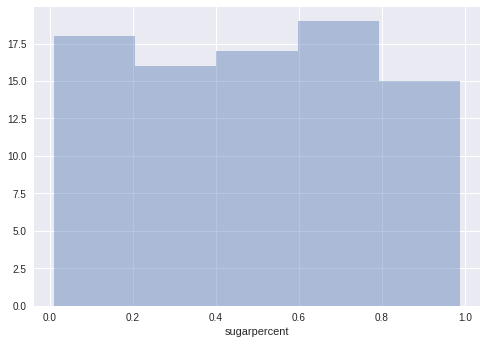

In [211]:
sns.distplot(df.sugarpercent, kde=False);
plt.style.use('seaborn')

In [17]:
#stats.kstest(df.sugarpercent, 'norm')
_, p_val = stats.shapiro(df.sugarpercent)

print(f'p_value: {p_val}')

p_value: 0.0036657273303717375


Non-normality has to be assumed.

#### __Pricepercent__

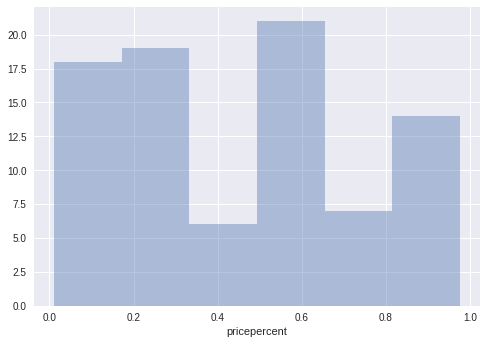

In [77]:
sns.distplot(df.pricepercent, kde=False);
plt.style.use('seaborn')

In [18]:
_, p_val = stats.shapiro(df.pricepercent)

print(f'p_value: {p_val}')

p_value: 0.000993519090116024


Non-normality has to be assumed.

#### __Winpercent__

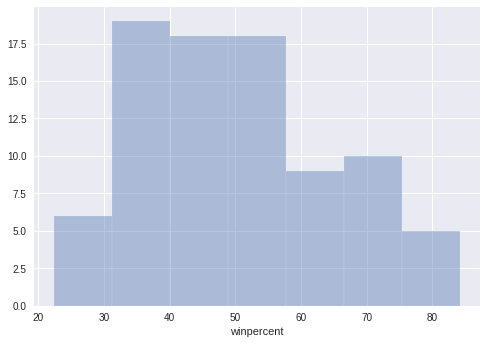

In [107]:
sns.distplot(df.winpercent, kde=False);
plt.style.use('seaborn')

In [19]:
_, p_val = stats.shapiro(df.winpercent)

print(f'p_value: {p_val}')

p_value: 0.13907994329929352


Normality can be assumed.

__Due to the non-normality of 2 out of three numeric variables, the numreical variables are compared to the categoricals with the Mann-Whiteny (instead of t test)__

### __Interactions between categoricals and numericals with Mann-Whitney__

H0: features are independent from each other (p_val >= 0.05)

H1: features are dependent (p_val < 0.05)

In [13]:
def ttest(df, categoricals, numericals):
    
    ttest_results = pd.DataFrame()
    for i in categoricals:
        for j in numericals:

            x = df[df[f'{i}']==1].loc[:, f'{j}']
            y = df[df[f'{i}']==0].loc[:, f'{j}']
            
            ttest_results = ttest_results.append(pd.DataFrame(data=[round(stats.mannwhitneyu(x, y, alternative='two-sided').pvalue, 4)], index=[(i, j)], columns=['p_val']))
            
    return ttest_results

In [14]:
cat_num_is = ttest(df, categoricals, numericals)
cat_num_is[cat_num_is.p_val<0.05]

,p_val
"(chocolate, pricepercent)",0.0000
"(chocolate, winpercent)",0.0000
"(fruity, pricepercent)",0.0001
"(fruity, winpercent)",0.0014
"(caramel, sugarpercent)",0.0429
"(caramel, pricepercent)",0.0207
"(peanutyalmondy, pricepercent)",0.0034
"(peanutyalmondy, winpercent)",0.0005
"(crispedricewafer, pricepercent)",0.0032
"(crispedricewafer, winpercent)",0.0041


Chocolate, fruity, peanutyalmondy, crispedricewafer, hard, bar, pluribus do correlate with winpercent.
Note that out of these, all of them correlate with the presence of chocolate.

__Sugarpercent is independent of almost all categoricals but caramel. Even with caramel the p_val is close to the H0 threshold.__

## __Conclusions of pre-examinations__

The only sensible fit that could be performed is between chocolate which directly represents all other categoricals but nougat (although nougat correlates with variables that correlate with chocolate) and winpercent. Sugarpercent might be added as it only mildly correlates with just a single categorical (caramel) where the p value is close to the threshold of H0 acceptance.

## __Identification of context between features and winpercent__

### __Linear fitting__

In [15]:
#let's confirm the above statement

lm_all = ols(f'winpercent ~ \
{df.columns[0]}\
+{df.columns[1]}\
+{df.columns[2]}\
+{df.columns[3]}\
+{df.columns[4]}\
+{df.columns[5]}\
+{df.columns[6]}\
+{df.columns[7]}\
+{df.columns[8]}\
+{df.columns[9]}\
+{df.columns[10]}',
              data=df).fit()

print(lm_all.pvalues > 0.05)
lm_all.conf_int()

Intercept           False
chocolate           False
fruity              False
caramel              True
peanutyalmondy      False
nougat               True
crispedricewafer     True
hard                 True
bar                  True
pluribus             True
sugarpercent         True
pricepercent         True
dtype: bool


,0,1
Intercept,25.924433,43.143524
chocolate,11.977920,27.518214
fruity,1.922694,16.921950
caramel,-5.064634,9.513597
peanutyalmondy,2.864315,17.277062
nougat,-10.588491,12.197152
crispedricewafer,-1.579898,19.417838
hard,-13.051416,0.720763
bar,-9.645127,10.528207
pluribus,-6.913454,5.204455


As suggested by the Chi square test, any model regression is going to be meaningless in its interpretation of the coefficients.
That means, in the case of the linear fit above, in case all features would have been independent from each other as opposed to what we discovered (Chi square, Mann-Whitney), the coefficients would indicate by hoe much winpercent would increase in the presence or absence of a certain categorical.

Since they are not independent from each other, the coefficients are not meaningful. Besides by the above hypothesis tests, this is furthermore suggested by the p_values as well as the 95% confidence intervals (0, 1).

In [16]:
lm_fit = ols(f'winpercent ~ chocolate+nougat+sugarpercent',
             data=df).fit()

round(lm_fit.pvalues, 4)

Intercept       0.0000
chocolate       0.0000
nougat          0.7926
sugarpercent    0.0584
dtype: float64

__Even with the most potential features, two of the variables do not substantially correlate with winpercent.__

### __Getting most relevant combinations of categoricals without linear regression__

Due to our findings from above, not much statistics is to be performed any more to reliably tell which of the possible combinations of features results in the most popular sweet. Hence, we proceed by simply listing different feature combinations ordered by their popularity.

In [25]:
def get_unique_combinations(features):
    
    binary = [1, 0]
    features_bin = [[j, i] for i in binary for j in features]
    
    feature_combinations = [list(itertools.combinations(features_bin, len(features)))]
    list_feature_combinations = [list(i) for sublist in feature_combinations for i in sublist]
    flat_combinations = [j for j in list_feature_combinations]
    
    unique_combinations = []
    for set_of_items in flat_combinations:
        item_list = [set_of_items[i][0] for i in range(len(set_of_items))]
        if len(item_list) == len(set(item_list)):
            unique_combinations.append(set_of_items)
            
    return unique_combinations

In [26]:
def combination_popularity(df, combinations):
    
    combination_winpercents = pd.DataFrame()
     
    for set_of_items in combinations:
            
        winpercent, count = df[
            (df[set_of_items[0][0]]==set_of_items[0][1]) &
            (df[set_of_items[1][0]]==set_of_items[1][1]) &
            (df[set_of_items[2][0]]==set_of_items[2][1]) &
            (df[set_of_items[3][0]]==set_of_items[3][1]) &
            (df[set_of_items[4][0]]==set_of_items[4][1]) &
            (df[set_of_items[5][0]]==set_of_items[5][1]) &
            (df[set_of_items[6][0]]==set_of_items[6][1]) &
            (df[set_of_items[7][0]]==set_of_items[7][1]) &
            (df[set_of_items[8][0]]==set_of_items[8][1])
        ].loc[:, 'winpercent'].agg(['mean', 'count'])
        
        
        combination_winpercents = combination_winpercents.append(pd.DataFrame(data=[[set_of_items, winpercent, int(count)]], columns=['combination', 'winpercent', 'counts'])) 
        
        
    return combination_winpercents.sort_values(by='winpercent', ascending=False).set_index('combination', drop=True)

In [27]:
unique_combinations = get_unique_combinations(categoricals)

In [28]:
combination_ranking = combination_popularity(df, unique_combinations)

In [29]:
combination_ranking.head(10)

,winpercent,counts
combination,,
"[[chocolate, 1], [peanutyalmondy, 1], [fruity, 0], [caramel, 0], [nougat, 0], [crispedricewafer, 0], [hard, 0], [bar, 0], [pluribus, 0]]",79.644816,3
"[[chocolate, 1], [caramel, 1], [crispedricewafer, 1], [bar, 1], [fruity, 0], [peanutyalmondy, 0], [nougat, 0], [hard, 0], [pluribus, 0]]",74.307320,2
"[[chocolate, 1], [peanutyalmondy, 1], [pluribus, 1], [fruity, 0], [caramel, 0], [nougat, 0], [crispedricewafer, 0], [hard, 0], [bar, 0]]",71.461276,3
"[[chocolate, 1], [crispedricewafer, 1], [bar, 1], [fruity, 0], [caramel, 0], [peanutyalmondy, 0], [nougat, 0], [hard, 0], [pluribus, 0]]",68.507920,3
"[[chocolate, 1], [caramel, 1], [nougat, 1], [bar, 1], [fruity, 0], [peanutyalmondy, 0], [crispedricewafer, 0], [hard, 0], [pluribus, 0]]",66.950129,2
"[[chocolate, 1], [caramel, 1], [peanutyalmondy, 1], [nougat, 1], [bar, 1], [fruity, 0], [crispedricewafer, 0], [hard, 0], [pluribus, 0]]",66.794164,2
"[[chocolate, 1], [caramel, 1], [bar, 1], [fruity, 0], [peanutyalmondy, 0], [nougat, 0], [crispedricewafer, 0], [hard, 0], [pluribus, 0]]",64.353340,1
"[[chocolate, 1], [caramel, 1], [pluribus, 1], [fruity, 0], [peanutyalmondy, 0], [nougat, 0], [crispedricewafer, 0], [hard, 0], [bar, 0]]",60.390179,2
"[[chocolate, 1], [caramel, 1], [peanutyalmondy, 1], [crispedricewafer, 1], [bar, 1], [fruity, 0], [nougat, 0], [hard, 0], [pluribus, 0]]",59.529251,1


The most favourable sweet among the tested ones contains chocoalte and is peanutyalmondy.

In [30]:
df[(df.chocolate==1) &
  (df.peanutyalmondy==1)]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641
Peanut M&Ms,1,0,0,1,0,0,0,0,1,0.593,0.651,69.483788
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251


The most favourable sweet is namely Reese.

### __Dominant sweet attributes in top 10 sweets__

In [31]:
category_frequency = {}
for i in range(10):
    for j in range(len(combination_ranking.index[i])):
        if combination_ranking.index[i][j][0] not in category_frequency and combination_ranking.index[i][j][1] == 1:
            category_frequency[combination_ranking.index[i][j][0]] = 1
        elif combination_ranking.index[i][j][0] not in category_frequency and combination_ranking.index[i][j][1] == 0:
            category_frequency[combination_ranking.index[i][j][0]] = 0
        elif combination_ranking.index[i][j][0] in category_frequency and combination_ranking.index[i][j][1] == 1:
            category_frequency[combination_ranking.index[i][j][0]] += 1
        else:
            continue
        
sorted_d = sorted(((value, key) for (key,value) in category_frequency.items()), reverse=True)
sorted_d

[(10, 'chocolate'),
 (7, 'bar'),
 (6, 'caramel'),
 (5, 'peanutyalmondy'),
 (3, 'crispedricewafer'),
 (2, 'pluribus'),
 (2, 'nougat'),
 (0, 'hard'),
 (0, 'fruity')]

The frequency of sweet attrbutes from the 10 most famous candies speaks for itself.

## __Designing our own candy__

### __Basic qualitative features: getting to three head categories__

In the following, the categoricals are divided into basic head categories which are necessary attributes of each candy. It is assumed that these do not interfere with each other.

They are namely taste (Geschmack), consistency (Konsistenz), and handling (Handhabung).

In [32]:
taste = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat']
consistency = ['crispedricewafer', 'hard']
handling = ['bar', 'pluribus']

In [33]:
def combination_popularity(df, combinations):
    
    combinations_ranking = pd.DataFrame()
    

    for set_of_items in combinations:
        if len(set_of_items)==5:

            winpercent, counts = df[
                (df[set_of_items[0][0]]==set_of_items[0][1]) &
                (df[set_of_items[1][0]]==set_of_items[1][1]) &
                (df[set_of_items[2][0]]==set_of_items[2][1]) &
                (df[set_of_items[3][0]]==set_of_items[3][1]) &
                (df[set_of_items[4][0]]==set_of_items[4][1])
            ].loc[:, 'winpercent'].agg(['mean', 'count'])

        else:
            winpercent, counts = df[
                (df[set_of_items[0][0]]==set_of_items[0][1]) &
                (df[set_of_items[1][0]]==set_of_items[1][1]) 
            ].loc[:, 'winpercent'].agg(['mean', 'count'])

        combinations_ranking = combinations_ranking.append(pd.DataFrame(data=[[set_of_items, winpercent, counts]], columns=['combination', 'winpercentage', 'counts']))
        
    return combinations_ranking[combinations_ranking['counts']>0].sort_values(by='winpercentage', ascending=False).set_index('combination')

In [34]:
unique_taste = get_unique_combinations(taste)
taste_ranking = combination_popularity(df, unique_taste)

taste_ranking.head()

,winpercentage,counts
combination,,
"[[chocolate, 1], [peanutyalmondy, 1], [fruity, 0], [caramel, 0], [nougat, 0]]",69.880879,9.0
"[[chocolate, 1], [caramel, 1], [nougat, 1], [fruity, 0], [peanutyalmondy, 0]]",66.950129,2.0
"[[chocolate, 1], [caramel, 1], [peanutyalmondy, 1], [nougat, 1], [fruity, 0]]",66.794164,2.0
"[[chocolate, 1], [caramel, 1], [fruity, 0], [peanutyalmondy, 0], [nougat, 0]]",66.749667,5.0
"[[chocolate, 1], [caramel, 1], [peanutyalmondy, 1], [fruity, 0], [nougat, 0]]",59.529251,1.0


In [35]:
taste_attribute_frequency = {}
for i in range(5):
    for j in range(len(taste_ranking.index[i])):
        if taste_ranking.index[i][j][0] not in taste_attribute_frequency and taste_ranking.index[i][j][1] == 1:
            taste_attribute_frequency[taste_ranking.index[i][j][0]] = 1
        elif taste_ranking.index[i][j][0] not in taste_attribute_frequency and taste_ranking.index[i][j][1] == 0:
            taste_attribute_frequency[taste_ranking.index[i][j][0]] = 0
        elif taste_ranking.index[i][j][0] in taste_attribute_frequency and taste_ranking.index[i][j][1] == 1:
            taste_attribute_frequency[taste_ranking.index[i][j][0]] += 1
        else:
            continue
            
sorted_d = sorted(((value, key) for (key,value) in taste_attribute_frequency.items()), reverse=True)
sorted_d

[(5, 'chocolate'),
 (4, 'caramel'),
 (3, 'peanutyalmondy'),
 (2, 'nougat'),
 (0, 'fruity')]

In [36]:
taste_ranking_df = pd.DataFrame({'Geschmack': ['Schokolade,\nErdnüsse / Mandeln', 
                      'Schokolade, \nKaramel, \nNougat',
                     'Schokolade, \nErdnüsse / Mandeln, \nNougat, \nKaramell',], 
        'Beliebtheit': [69.88, 66.95, 66.79],
        'counts':[9, 2, 2,]})

/home/user/venvs/smc/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


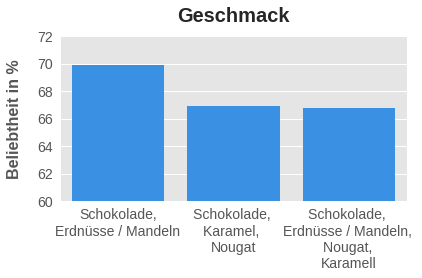

In [54]:
#counts-dependent color code
#pal = sns.light_palette('navy', 3, reverse=True)
#rank = pd.Series(index=[0,1,2], data=[2,1,1])

plt.style.use('ggplot')

plt.figure(figsize=(6, 4))
fig = sns.barplot(x=taste_ranking_df.Geschmack, y=taste_ranking_df.Beliebtheit, color='dodgerblue')
fig.set_ylim(bottom=60, top=72)

fig.yaxis.labelpad = 15
fig.xaxis.labelpad = 15
plt.ylabel(ylabel = 'Beliebtheit in %', weight='bold', fontsize=16)
#plt.xlabel(xlabel='Kombinationen Süßwarenattribute', weight='bold', fontsize=16)
plt.title('Geschmack', weight='bold', fontsize=20)
title = fig.title
title.set_position([.5, 1.05])

#hide xlabel
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_label_text('foo')
x_label = x_axis.get_label()
x_label.set_visible(False)

for tick in fig.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    
for tick in fig.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)



plt.tight_layout()

file_path = '/home/user/Desktop/Privat/Bewerbungen/2020/Lidl/case_study/images/taste_ranking'
plt.savefig(file_path)

The most favourable combination of features for the best taste consists of chocolate and peanutyalmondy.

In [31]:
unique_consistency = get_unique_combinations(consistency)
consistency_ranking = combination_popularity(df, unique_consistency)

consistency_ranking.head()

,winpercentage,counts
combination,,
"[[crispedricewafer, 1], [hard, 0]]",66.170252,7.0
"[[crispedricewafer, 0], [hard, 0]]",50.890451,63.0
"[[hard, 1], [crispedricewafer, 0]]",40.508982,15.0


In [32]:
consistency_ranking_df = pd.DataFrame({'Konsistenz': ['Waffelschicht', 
                                                      'Hart',
                                                      'keine Waffelschicht, \nnicht hart',], 
        'Beliebtheit': [66.17, 50.89, 40.5],
        'counts':[7, 63, 15,]})

/home/user/venvs/smc/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


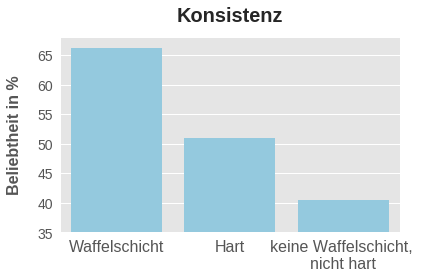

In [56]:
#counts-dependent color code
#pal = sns.light_palette('navy', 3, reverse=True)
#rank = consistency_ranking_df.counts.argsort().argsort()# http://stackoverflow.com/a/6266510/1628638

plt.style.use('ggplot')

plt.figure(figsize=(6, 4))
fig = sns.barplot(x=consistency_ranking_df.Konsistenz, y=consistency_ranking_df.Beliebtheit, color='skyblue')
fig.set_ylim(bottom=35, top=68)

fig.yaxis.labelpad = 15
fig.xaxis.labelpad = 15
plt.ylabel(ylabel = 'Beliebtheit in %', weight='bold', fontsize=16)
#plt.xlabel(xlabel='Kombinationen Süßwarenattribute', weight='bold', fontsize=16)
plt.title('Konsistenz', weight='bold', fontsize=20)
title = fig.title
title.set_position([.5, 1.05])

#hide xlabel
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_label_text('foo')
x_label = x_axis.get_label()
x_label.set_visible(False)

for tick in fig.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
for tick in fig.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)



plt.tight_layout()

file_path = '/home/user/Desktop/Privat/Bewerbungen/2020/Lidl/case_study/images/consistency_ranking'
plt.savefig(file_path)

The most favourable consistency is of crispedricewafer.

In [7]:
df[df.crispedricewafer==1]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
Nestle Crunch,1,0,0,0,0,1,0,1,0,0.313,0.767,66.470680
HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251
Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [37]:
unique_handling = get_unique_combinations(handling)
handling_ranking = combination_popularity(df, unique_handling)

handling_ranking.head()

,winpercentage,counts
combination,,
"[[bar, 1], [pluribus, 0]]",61.295413,21.0
"[[pluribus, 1], [bar, 0]]",46.822781,44.0
"[[bar, 0], [pluribus, 0]]",46.475945,20.0


In [58]:
handling_ranking_df = pd.DataFrame({'Handhabung': ['Riegel', 
                                                   'Kleine Stücke \nin Box',
                                                    'kein Riegel, \nkeine kleinen \nStücke',], 
        'Beliebtheit': [66.29, 46.82, 46.48],
        'counts':[21, 22, 20,]})

/home/user/venvs/smc/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


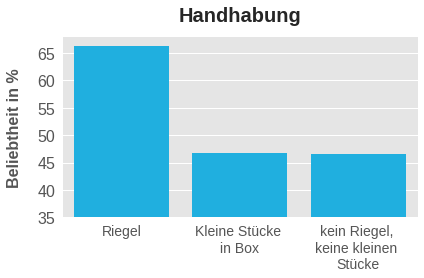

In [59]:
#counts-dependent color code
#pal = sns.light_palette('navy', 3, reverse=True)
#rank = consistency_ranking_df.counts.argsort().argsort()# http://stackoverflow.com/a/6266510/1628638

plt.style.use('ggplot')

plt.figure(figsize=(6, 4))
fig = sns.barplot(x=handling_ranking_df.Handhabung, y=handling_ranking_df.Beliebtheit, color='deepskyblue')
fig.set_ylim(bottom=35, top=68)

fig.yaxis.labelpad = 15
fig.xaxis.labelpad = 15
plt.ylabel(ylabel = 'Beliebtheit in %', weight='bold', fontsize=16)
#plt.xlabel(xlabel='Kombinationen Süßwarenattribute', weight='bold', fontsize=16)
plt.title('Handhabung', weight='bold', fontsize=20)
title = fig.title
title.set_position([.5, 1.05])

#hide xlabel
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_label_text('foo')
x_label = x_axis.get_label()
x_label.set_visible(False)

for tick in fig.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    
for tick in fig.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)



plt.tight_layout()

file_path = '/home/user/Desktop/Privat/Bewerbungen/2020/Lidl/case_study/images/handling_ranking'
plt.savefig(file_path)

The most favourable handling of candies is as a bar.

### __Let's combine all features to create our own candy with the most promising features.__

In [179]:
df[(df.chocolate==1) &
  (df.peanutyalmondy==1) &
  (df.fruity==0) &
  (df.caramel==0) &
  (df.nougat==0) &
  (df.crispedricewafer==1) &
  (df.hard==0) &
  (df.bar==1) &
  (df.pluribus==0)]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,


Oh, it does not yet exist!

__Conclusion: our self-created candy is going to contain chocolate and a crsipedwafer as well as will be peanutyalmondy. It will be provided as a bar.__